In [1]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

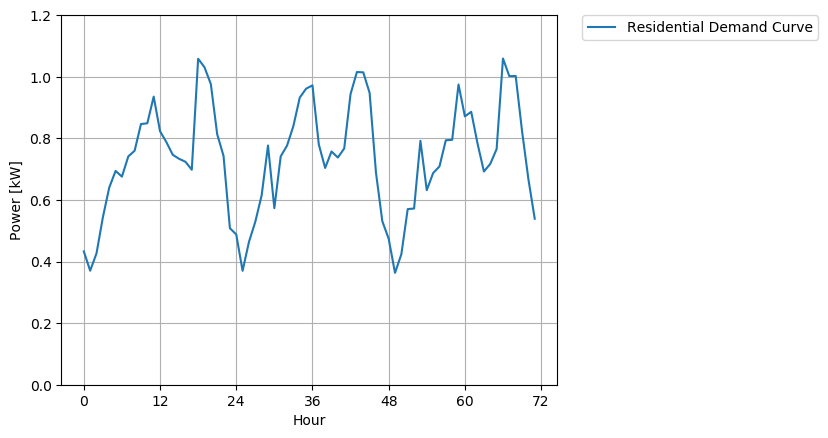

In [2]:
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);
plot(ts["demand_curve"], label = "Residential Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,1.2)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

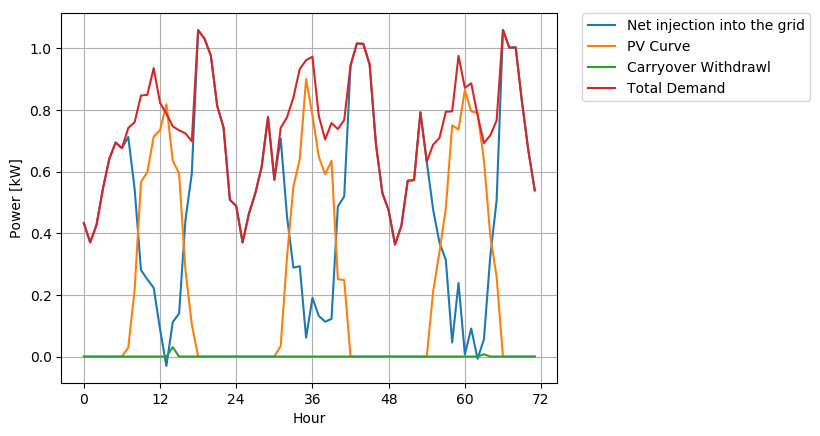

In [3]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

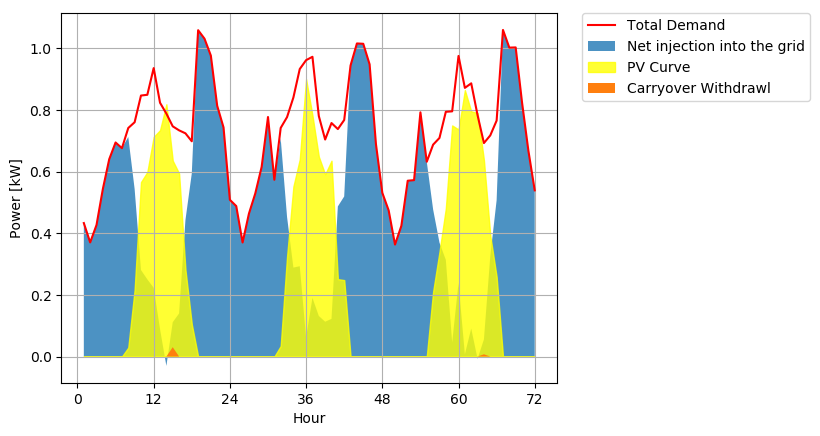

In [4]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [5]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus  | carryover real_surplus
1 545.7 203.88  | 4.06 4.06 341.82  | 203.88 4.06 99.9 4.06  | 0.0 0.0
2 544.95 126.82  | 0.0 0.0 418.13  | 330.7 4.06 157.98 0.0  | 0.0 0.0
3 548.07 153.22  | 0.0 0.0 394.85  | 483.93 4.06 233.06 0.0  | 0.0 0.0
4 541.16 173.87  | 0.0 0.0 367.29  | 657.8 4.06 318.26 0.0  | 0.0 0.0
5 554.52 174.29  | 0.0 0.0 380.23  | 832.08 4.07 403.66 0.0  | 0.0 0.0
6 557.49 159.43  | 0.0 0.0 398.06  | 991.52 4.07 481.78 0.0  | 0.0 0.0
7 539.99 157.44  | 0.43 0.43 382.55  | 1148.95 4.49 558.92 0.43  | 0.0 0.0
8 546.45 179.83  | 0.25 0.25 366.62  | 1328.78 4.74 646.61 0.25  | 0.0 0.0
9 538.42 184.34  | 0.29 0.29 354.08  | 1513.12 5.03 736.69 0.29  | 0.0 0.0
10 557.35 165.63  | 0.0 0.0 391.72  | 1678.76 5.03 817.56 0.0  | 0.0 0.0
11 558.21 159.63  | 0.0 0.0 398.58  | 1838.39 5.03 895.78 0.0  | 0.0 0.0
12 559.28 171.98  | 0.0 0.0 387.3

### Billings case residential 1

In [6]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
116914.99 85.44 117000.44  | 140161.69 23161.25
125615.81 0.0 125615.81  | 140076.03 14460.22
122961.24 0.0 122961.24  | 140431.93 17470.69
119819.55 0.0 119819.55  | 139643.87 19824.32
121295.25 0.06 121295.31  | 141167.58 19872.27
123327.29 0.0 123327.29  | 141505.74 18178.44
121559.56 8.94 121568.5  | 139510.39 17941.89
119742.46 5.24 119747.7  | 140246.91 20499.21
118312.86 6.1 118318.96  | 139331.3 21012.35
122604.81 0.0 122604.81  | 141490.19 18885.38
123387.01 0.0 123387.01  | 141588.18 18201.16
122101.09 0.0 122101.09  | 141709.88 19608.8


## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [7]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

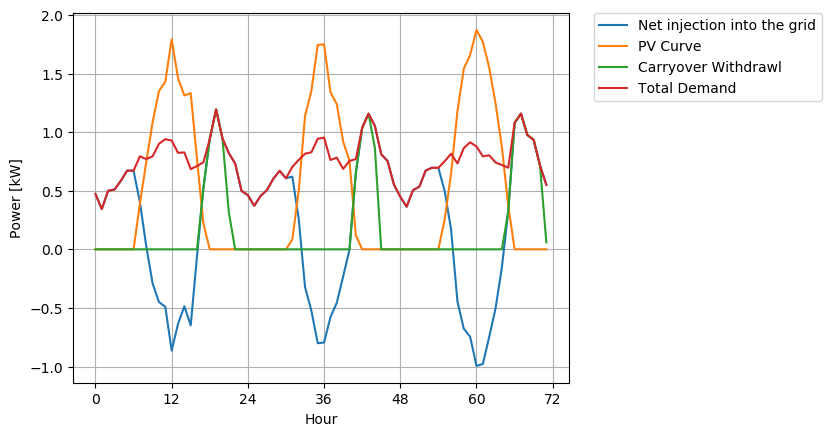

In [8]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

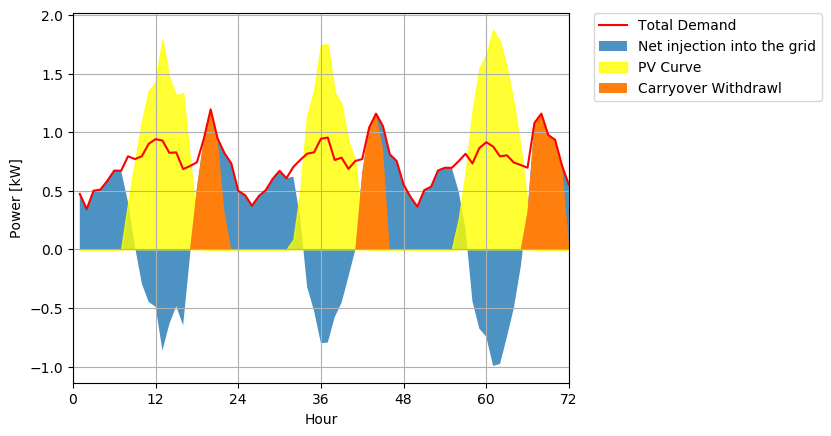

In [9]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [10]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus  | carryover real_surplus
1 545.86 379.04  | 135.11 135.11 166.82  | 379.04 135.11 185.73 135.11  | 0.0 0.0
2 543.86 276.91  | 74.23 74.23 266.95  | 655.95 209.34 186.31 74.23  | 0.0 0.0
3 551.63 302.53  | 84.74 84.74 249.1  | 958.48 294.08 260.32 84.74  | 0.0 0.0
4 544.17 308.05  | 80.44 80.44 236.11  | 1266.53 374.52 326.53 80.44  | 0.0 0.0
5 556.57 362.58  | 108.24 108.24 193.99  | 1629.12 482.76 423.75 108.24  | 0.0 0.0
6 556.66 337.68  | 106.18 106.18 218.98  | 1966.8 588.94 480.97 106.18  | 0.0 0.0
7 541.74 347.89  | 107.26 107.26 193.84  | 2314.69 696.2 545.26 107.26  | 0.0 0.0
8 548.45 332.38  | 99.58 99.58 216.07  | 2647.07 795.78 600.87 99.58  | 0.0 0.0
9 537.53 337.07  | 102.7 102.7 200.46  | 2984.14 898.48 666.45 102.7  | 0.0 0.0
10 558.58 346.67  | 107.29 107.29 211.91  | 3330.81 1005.77 733.62 107.29  | 0.0 0.0
11 561.2 335.22  

### Billings case residential 2

In [11]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
74516.11 2841.34 77357.45  | 140180.29 62822.83
86441.35 1561.06 88002.41  | 139951.52 51949.11
84473.14 1782.0 86255.15  | 140838.08 54582.93
83040.35 1691.72 84732.08  | 139986.88 55254.8
76469.07 2276.27 78745.34  | 141401.36 62656.02
81150.75 2233.01 83383.76  | 141411.93 58028.17
76458.39 2255.64 78714.03  | 139709.75 60995.72
80829.19 2094.14 82923.33  | 140475.3 57551.96
79057.0 2159.82 81216.82  | 139230.11 58013.28
80370.45 2256.33 82626.77  | 141629.78 59003.0
81923.12 2101.68 84024.81  | 141929.42 57904.62
83184.86 1749.03 84933.89  | 141493.45 56559.56


## Residential Case 3: Large PV System that generates multi-day carry over

In [12]:
PVRes.capacity = 4.0
ts=simulate(residential, PVRes, 3);

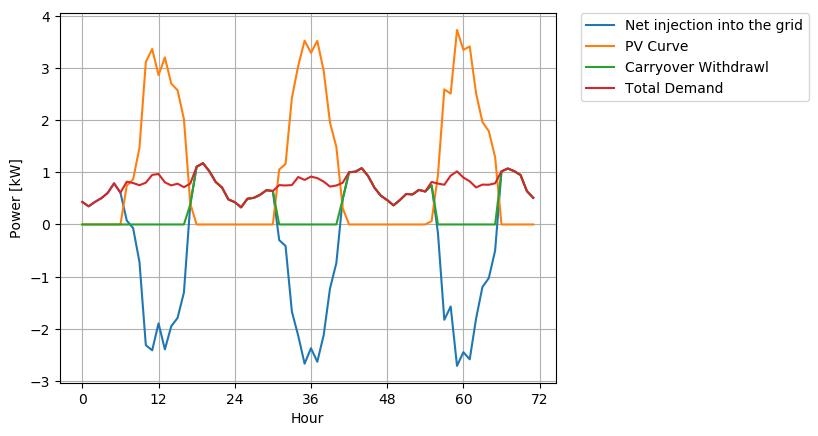

In [13]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

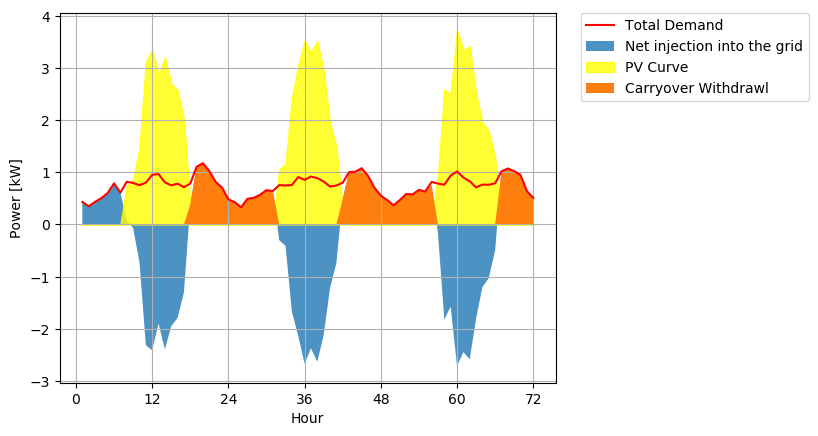

In [14]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [15]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus  | carryover real_surplus
1 545.93 793.76  | 531.39 283.56 0.0  | 793.76 283.56 388.94 388.94  | 105.38 247.83
2 542.57 546.89  | 303.76 299.43 0.0  | 1340.65 582.99 373.36 373.36  | 73.93 109.71
3 552.18 575.34  | 346.48 323.33 0.0  | 1915.99 906.32 355.84 355.84  | 32.51 97.08
4 541.28 653.03  | 398.96 287.22 0.0  | 2569.01 1193.54 352.5 352.5  | 65.28 144.26
5 555.65 723.17  | 451.58 284.07 0.0  | 3292.18 1477.6 419.63 419.63  | 135.57 232.8
6 557.81 662.34  | 399.18 294.66 0.0  | 3954.52 1772.26 460.11 460.11  | 165.45 240.09
7 539.31 695.53  | 432.2 275.98 0.0  | 4650.05 2048.24 506.26 506.26  | 230.28 321.67
8 546.77 727.52  | 463.36 282.61 0.0  | 5377.57 2330.85 586.76 586.76  | 304.16 411.03
9 538.01 660.31  | 412.11 289.82 0.0  | 6037.88 2620.67 627.71 627.71  | 337.89 426.46
10 558.31 701.52  | 436.3 293.1 0.0  | 6739.39 2913.76 681

### Billings case residential 3

In [16]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
0.0 5963.28 5963.28  | 140187.45 134224.17
0.0 6297.01 6297.01  | 139804.51 133507.49
0.0 6799.62 6799.62  | 140900.81 134101.19
0.0 6040.18 6040.18  | 139657.74 133617.56
0.0 5973.91 5973.91  | 141296.18 135322.27
0.0 6196.62 6196.62  | 141542.3 135345.68
0.0 5803.93 5803.93  | 139433.53 133629.6
0.0 5943.2 5943.2  | 140283.28 134340.08
0.0 6094.88 6094.88  | 139285.22 133190.34
0.0 6163.82 6163.82  | 141599.79 135435.96
0.0 6201.26 6201.26  | 141325.06 135123.8
0.0 6193.71 6193.71  | 141721.03 135527.32


# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

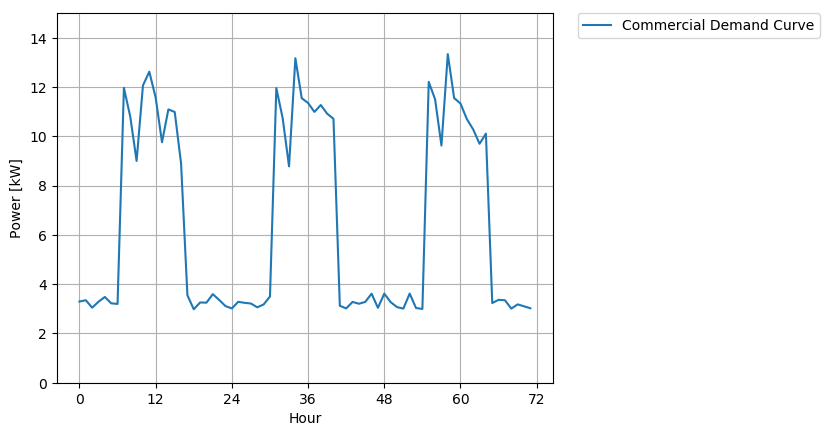

In [17]:
ts=simulate(commercial, PVComInd, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,15)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [18]:
mean(commercial.peak_power)

13.847359136480511

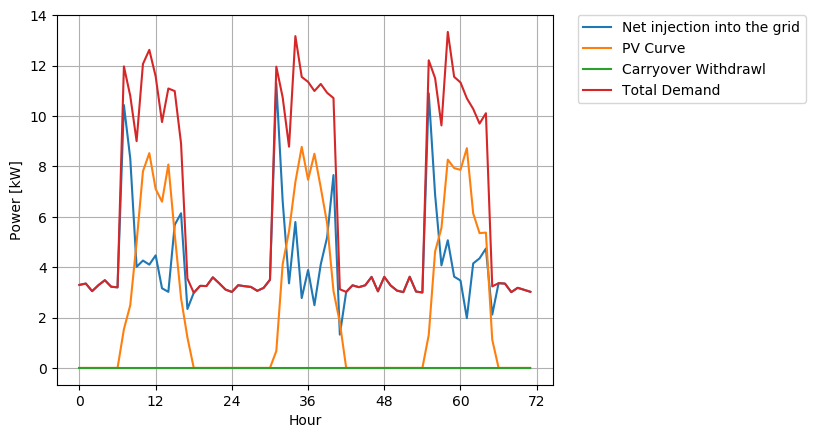

In [19]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

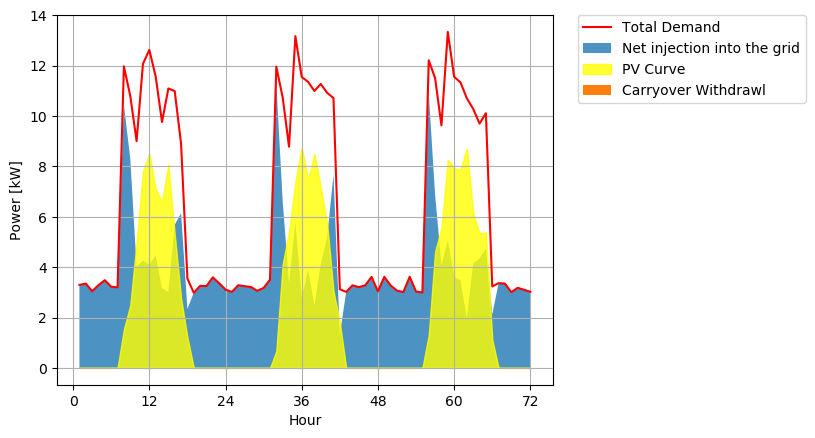

In [20]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [21]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 4985.84 1918.29  | 0.0 0.0 3067.55  | 14.75 10.11  | 1918.29 0.0 939.96 0.0  | 0.0 0.0
2 5082.92 1396.45  | 0.0 0.0 3686.47  | 16.86 12.59  | 3314.74 0.0 1624.22 0.0  | 0.0 0.0
3 4857.45 1400.8  | 0.0 0.0 3456.65  | 14.37 10.81  | 4715.54 0.0 2310.62 0.0  | 0.0 0.0
4 5040.28 1710.98  | 0.0 0.0 3329.3  | 15.44 10.22  | 6426.52 0.0 3149.0 0.0  | 0.0 0.0
5 5351.42 1796.71  | 0.0 0.0 3554.71  | 15.93 10.72  | 8223.23 0.0 4029.38 0.0  | 0.0 0.0
6 5205.11 1610.55  | 0.0 0.0 3594.57  | 16.02 10.77  | 9833.78 0.0 4818.55 0.0  | 0.0 0.0
7 4957.85 1700.48  | 0.0 0.0 3257.37  | 14.84 10.64  | 11534.26 0.0 5651.79 0.0  | 0.0 0.0
8 5000.15 1712.05  | 0.0 0.0 3288.1  | 14.96 9.72  | 13246.32 0.0 6490.69 0.0  | 0.0 0.0
9 4925.76 1813.36  | 0.0 0.0 3112.4  | 15.18 10.47  | 15059.68 0.0 7379.24 0.0  | 0.0

In [22]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
224298.9 0.0 224298.9 115763.85  | 364564.26 168817.52  | 140265.36 53053.66
269554.55 0.0 269554.55 144142.47  | 371663.03 192978.46  | 102108.49 48835.99
252750.2 0.0 252750.2 123764.26  | 355176.86 164520.86  | 102426.66 40756.59
243438.25 0.0 243438.25 116982.74  | 368544.98 176740.65  | 125106.73 59757.91
259920.51 0.0 259920.51 122673.77  | 391296.17 182329.04  | 131375.66 59655.28
262834.61 0.0 262834.61 123230.22  | 380597.8 183321.91  | 117763.19 60091.68
238178.94 0.0 238178.94 121804.64  | 362518.16 169817.54  | 124339.22 48012.9
240425.54 0.0 240425.54 111209.46  | 365610.83 171245.14  | 125185.29 60035.68
227578.55 0.0 227578.55 119805.64  | 360171.71 173770.22  | 132593.16 53964.58
347084.52 9.73 347094.25 0.0  | 346574.07 162299.05  | -520.19 162299.05
246999.87 0.0 246999.87 120422.34  | 363756.83 173848.52  | 116756.96 

## Commercial case 2: medium PV system

In [23]:
PVComInd.capacity = 18.0
ts=simulate(commercial, PVComInd, 3);

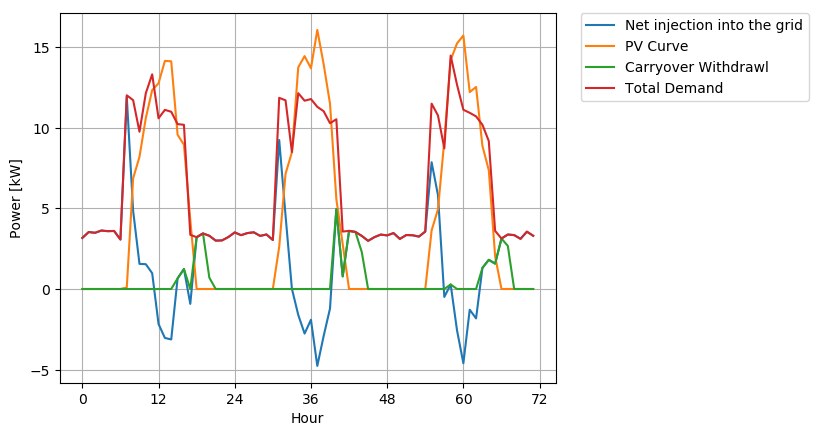

In [24]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

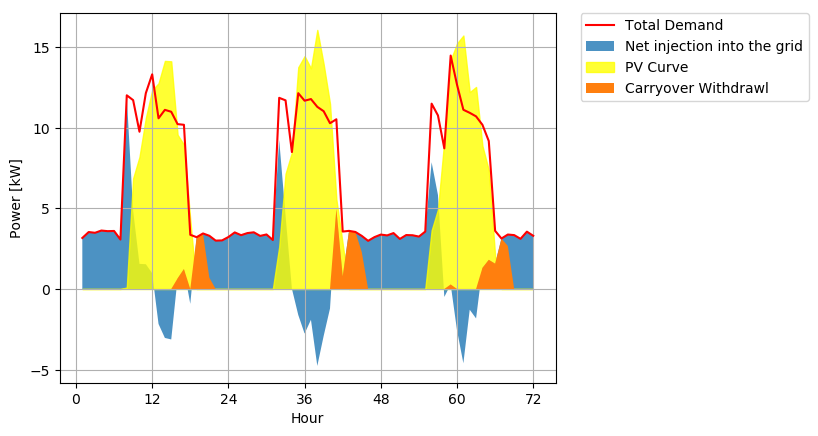

In [25]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [26]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 4982.55 3553.96  | 458.97 458.97 1428.59  | 14.81 6.76  | 3553.96 458.97 1741.44 458.97  | 0.0 0.0
2 5104.64 2454.26  | 49.92 49.92 2650.37  | 16.82 12.56  | 6008.22 508.89 2485.05 49.92  | 0.0 0.0
3 4845.6 2623.19  | 177.8 177.8 2222.42  | 14.26 10.84  | 8631.4 686.69 3720.49 177.8  | 0.0 0.0
4 5021.16 3028.78  | 204.67 204.67 1992.38  | 15.4 10.1  | 11660.18 891.37 5026.79 204.67  | 0.0 0.0
5 5354.65 3043.45  | 117.31 117.31 2311.2  | 15.93 10.38  | 14703.63 1008.68 6313.41 117.31  | 0.0 0.0
6 5213.3 2745.79  | 44.94 44.94 2467.51  | 16.04 10.29  | 17449.42 1053.62 7541.54 44.94  | 0.0 0.0
7 4965.9 2924.29  | 106.49 106.49 2041.61  | 14.79 7.25  | 20373.71 1160.12 8929.49 106.49  | 0.0 0.0
8 4972.08 3074.39  | 207.58 207.58 1897.69  | 14.93 10.18  | 23448.1 1367.69 10329.45 207.58  | 0.

In [27]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", " savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energy savings_demand
173516.67 9652.17 183168.83 0.0  | 364323.81 169505.38  | 181154.98 169505.38
321914.51 1049.87 322964.37 0.0  | 373250.92 192505.85  | 50286.54 192505.85
269934.55 3739.15 273673.7 0.0  | 354310.46 163181.67  | 80636.76 163181.67
241994.28 4304.29 246298.56 0.0  | 367146.87 176323.48  | 120848.31 176323.48
280718.16 2467.07 283185.23 0.0  | 391531.99 182384.47  | 108346.76 182384.47
299703.99 945.18 300649.17 0.0  | 381196.49 183619.64  | 80547.32 183619.64
247973.83 2239.52 250213.34 0.0  | 363106.5 169253.98  | 112893.15 169253.98
230492.89 4365.37 234858.26 0.0  | 363558.5 170861.74  | 128700.24 170861.74
211700.1 4662.52 216362.62 0.0  | 359955.38 172304.79  | 143592.76 172304.79
214178.02 3561.64 217739.66 0.0  | 347442.76 161771.88  | 129703.1 161771.88
259208.23 3189.83 262398.06 0.0  | 361599.92 173397.49  | 99201.86 173397.49

## Commercial case 3: Large PV system

In [28]:
PVComInd.capacity = 28.0
ts=simulate(commercial, PVComInd, 3);

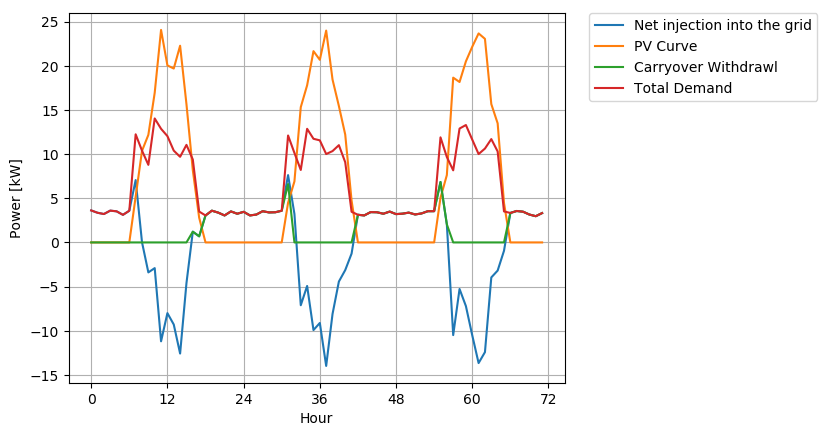

In [29]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

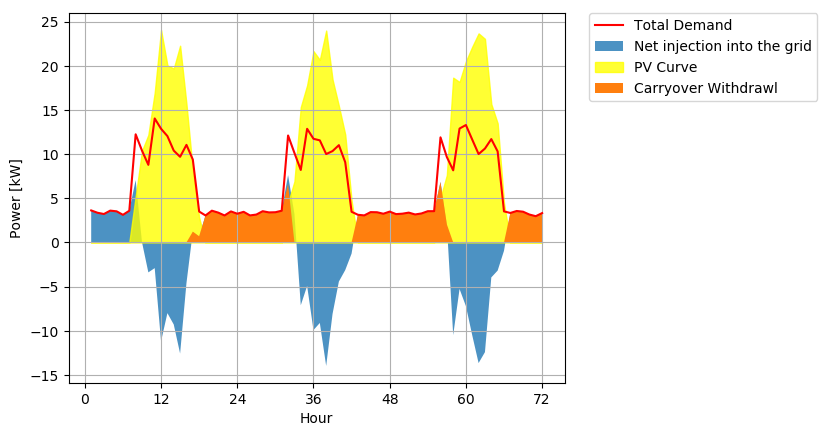

In [30]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [31]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 4986.26 5124.49  | 1612.66 1474.44 0.0  | 14.9 3.85  | 5124.49 1474.44 2511.0 1612.66  | 138.22 138.22
2 5117.16 3380.87  | 549.5 687.73 1598.06  | 16.8 12.61  | 8505.36 2162.16 2693.19 687.73  | 0.0 0.0
3 4861.92 4301.73  | 1280.39 1278.28 562.29  | 14.36 10.86  | 12807.09 3440.45 4113.31 1280.39  | 2.1 2.1
4 5015.63 4504.92  | 1367.3 1362.05 515.96  | 15.41 9.33  | 17312.01 4802.5 5042.44 1369.4  | 7.36 7.36
5 5342.12 5105.63  | 1652.21 1641.14 247.56  | 15.84 7.44  | 22417.65 6443.64 6182.15 1659.57  | 18.43 18.43
6 5191.58 4267.71  | 1024.36 1042.79 905.44  | 15.86 8.76  | 26685.36 7486.42 6632.19 1042.79  | 0.0 0.0
7 4963.47 4685.48  | 1443.84 1432.09 289.74  | 14.82 9.32  | 31370.85 8918.51 7885.29 1443.84  | 11.75 11.75
8 5010.65 4944.85  | 1753.76 1746.52 73.03  | 14.88 10.47  | 3

In [32]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
0.0 31007.43 31007.43 0.0  | 364595.66 170576.5  | 333588.23 170576.5
194100.72 14462.87 208563.59 0.0  | 374166.63 192333.05  | 165603.05 192333.05
68295.72 26882.31 95178.03 0.0  | 355503.59 164362.34  | 260325.56 164362.34
62668.51 28643.87 91312.38 0.0  | 366742.64 176381.45  | 275430.26 176381.45
30068.5 34513.23 64581.73 0.0  | 390616.12 181296.57  | 326034.39 181296.57
109975.34 21929.79 131905.13 0.0  | 379608.63 181574.18  | 247703.49 181574.18
35191.59 30116.78 65308.36 0.0  | 362929.21 169682.65  | 297620.84 169682.65
8870.61 36729.39 45600.0 0.0  | 366378.38 170279.49  | 320778.38 170279.49
11040.43 37071.06 48111.5 0.0  | 360494.36 173851.09  | 312382.86 173851.09
0.0 34640.66 34640.66 0.0  | 347447.87 161976.68  | 312807.21 161976.68
35113.49 31388.04 66501.52 0.0  | 362088.04 173582.59  | 295586.51 173582.59
0.0 34409.65 

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

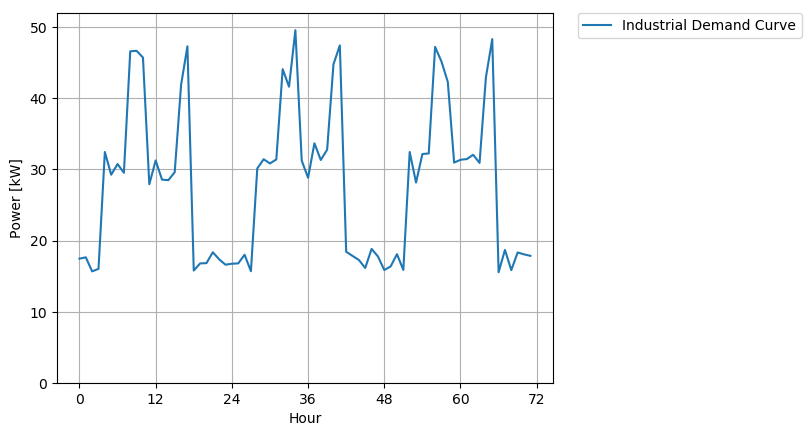

In [33]:
ts=simulate(mediumvoltage, PVTMT, 3);
plot(ts["demand_curve"], label = "Industrial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ylim(0,52)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

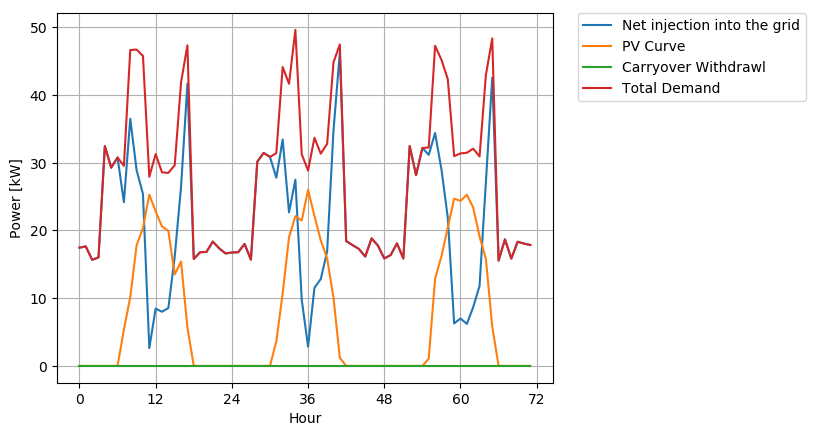

In [34]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

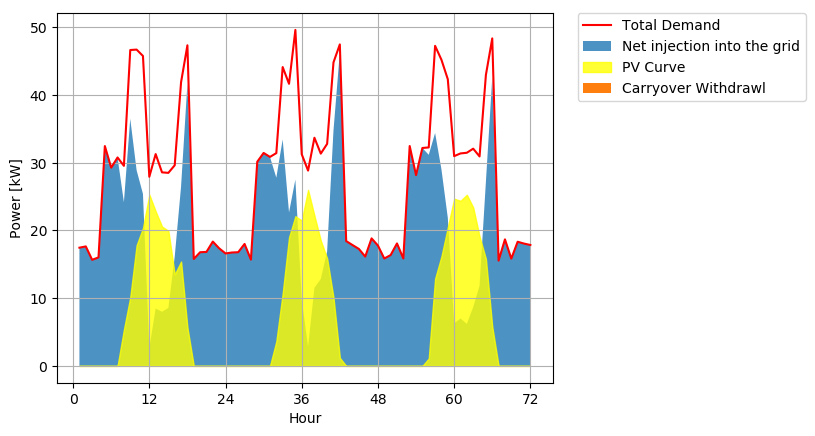

In [35]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [36]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 | 7171.53 8061.68 8061.68  | 5454.08 0.0 0.0  | 4988.14 4790.98 5741.24  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 5454.08 0.0 2672.5 0.0  | 0.0 0.0
2 | 6612.74 7422.19 7422.19  | 3901.21 0.0 0.0  | 4818.17 5315.54 5274.57  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 9355.3 0.0 4584.1 0.0  | 0.0 0.0
3 | 7244.77 8116.67 8116.67  | 4525.47 0.0 0.0  | 5234.24 5601.73 5713.62  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 13880.76 0.0 6801.57 0.0  | 0.0 0.0
4 | 7472.76 8361.64 8361.64  | 5031.16 0.0 0.0  | 5302.08 5501.16 5919.51  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 18911.92 0.0 9266.84 0.0  | 0.0 0.0
5 | 7214.25 8144.07 8144.07  | 5299.47 0.0 0.0  | 49

In [37]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
309065.41 148472.38 128087.03  | 0.0  | 309065.41 148472.38 128087.03  | 444347.85 249831.41 179856.04  | 135282.44 101359.03 51769.02  | 0.0 0.0 0.0 
298534.08 164728.57 117675.77  | 0.0  | 298534.08 164728.57 117675.77  | 409725.26 230013.66 165589.05  | 111191.18 65285.09 47913.28  | 0.0 0.0 0.0 
324313.43 173597.71 127470.88  | 0.0  | 324313.43 173597.71 127470.88  | 448885.83 251535.59 181082.9  | 124572.4 77937.88 53612.02  | 0.0 0.0 0.0 
328516.82 170480.8 132064.19  | 0.0  | 328516.82 170480.8 132064.19  | 463011.97 259127.17 186548.15  | 134495.15 88646.

## TMT Case2: Medium PV System

In [38]:
PVTMT.capacity = 60
ts=simulate(mediumvoltage, PVTMT, 3);

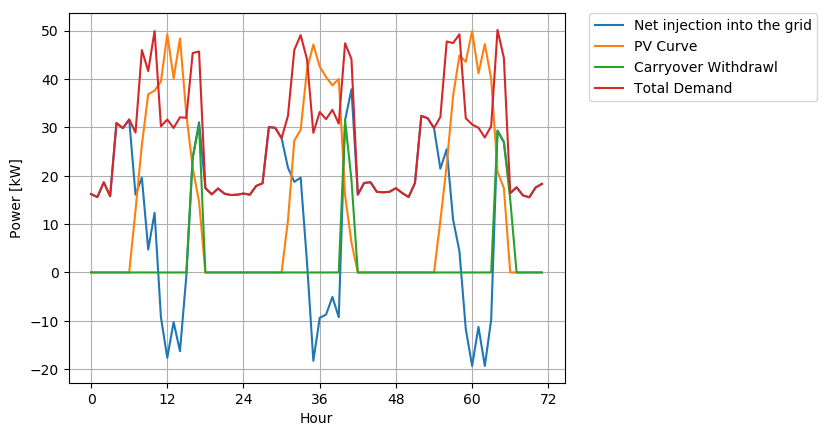

In [39]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

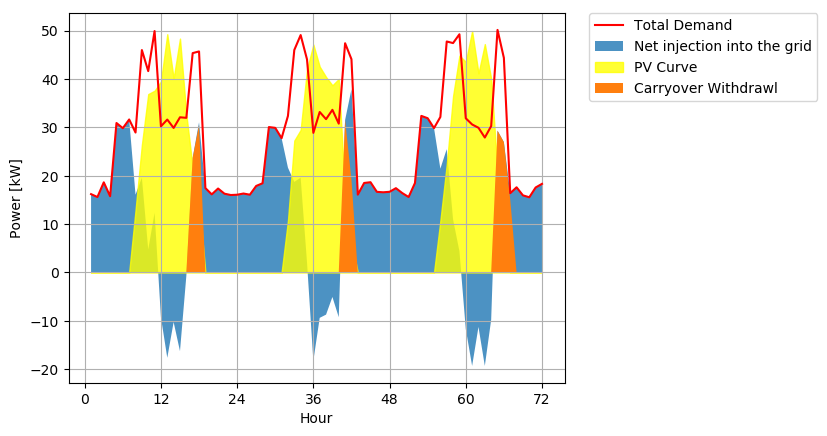

In [40]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [41]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 | 7222.49 8115.01 8115.01  | 11213.88 1541.17 1541.17  | 1449.58 2674.05 5720.16  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 11213.88 1541.17 5494.8 1541.17  | 0.0 0.0
2 | 6620.78 7442.15 7442.15  | 8267.14 704.3 704.3  | 3316.33 2479.45 5255.56  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 19481.02 2245.47 8004.53 704.3  | 0.0 0.0
3 | 7235.67 8152.62 8152.62  | 9742.98 526.8 526.8  | 3401.4 2243.91 5732.27  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 29224.0 2772.26 12074.29 526.8  | 0.0 0.0
4 | 7467.57 8429.27 8429.27  | 10512.92 1159.84 1159.84  | 2804.41 2579.51 5933.88  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 39736.92 3932.1 16698.83 1159.84  | 0.0

In [42]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
89815.72 82868.82 127616.79  | 32410.73  | 89815.72 82868.82 127616.79  | 447505.71 251484.1 181045.83  | 357689.99 168615.28 53429.04  | 0.0 0.0 0.0 
205480.1 76838.11 117251.5  | 14811.45  | 205480.1 76838.11 117251.5  | 410223.45 230632.19 166034.34  | 204743.34 153794.08 48782.83  | 0.0 0.0 0.0 
210750.68 69538.83 127886.84  | 11078.51  | 210750.68 69538.83 127886.84  | 448322.31 252649.54 181884.84  | 237571.63 183110.71 53998.0  | 0.0 0.0 0.0 
173761.4 79938.96 132384.84  | 24391.47  | 173761.4 79938.96 132384.84  | 462690.78 261223.02 188056.97  | 288929.3

## TMT Case 3: Large PV System

In [43]:
PVTMT.capacity = 100
ts=simulate(mediumvoltage, PVTMT, 3);

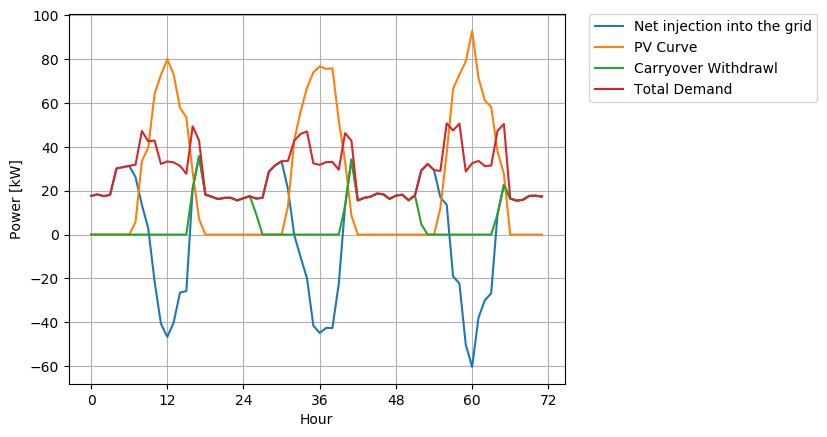

In [44]:
plot(ts["inyection_grid_h"],label = "Net injection into the grid")
plot(ts["pv_curve"], label = "PV Curve")
plot(ts["withdrawl_h"], label = "Carryover Withdrawl")
plot(ts["demand_curve"], label = "Total Demand")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

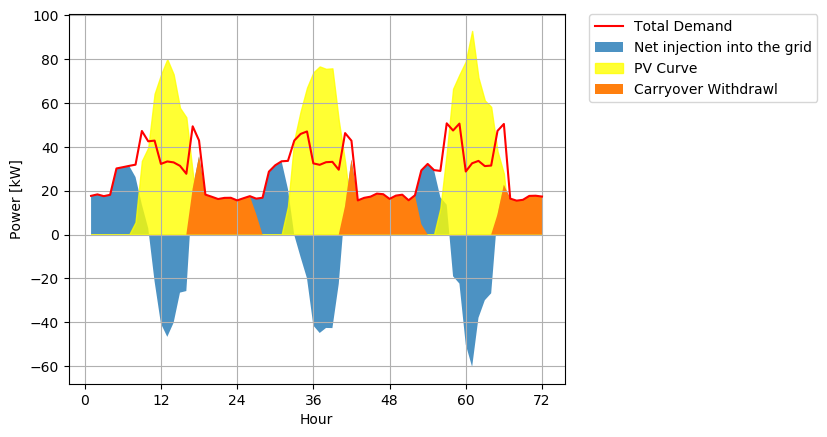

In [45]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [46]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 | 7215.5 8079.83 8079.83  | 19804.83 8613.91 8613.91  | 0.0 1227.31 0.0  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 19804.83 8613.91 9704.37 8613.91  | 0.0 0.0
2 | 6606.74 7472.23 7472.23  | 12856.92 3864.05 3864.05  | 16.56 1470.73 4978.27  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 32661.75 12477.96 7390.34 3864.05  | 0.0 0.0
3 | 7147.17 8109.81 8109.81  | 15942.57 5806.35 5806.35  | 0.0 1147.84 3876.56  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 48604.31 18284.31 11338.15 5806.35  | 0.0 0.0
4 | 7448.85 8412.33 8412.33  | 16683.52 5901.71 5901.71  | 0.0 1878.41 3181.88  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 65287.84 24186.02 13706.73 5901.71  | 0

In [47]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
0.0 38034.3 0.0  | 181150.63  | 0.0 38034.3 0.0  | 447072.16 250394.08 180261.11  | 447072.16 212359.78 180261.11  | 0.0 0.0 0.0 
1026.13 45577.78 111065.23  | 81260.96  | 1026.13 45577.78 111065.23  | 409353.8 231564.37 166705.42  | 408327.68 185986.59 55640.19  | 0.0 0.0 0.0 
0.0 35571.47 86486.06  | 122107.51  | 0.0 35571.47 86486.06  | 442838.6 251322.92 180929.8  | 442838.6 215751.45 94443.73  | 0.0 0.0 0.0 
0.0 58211.94 70987.69  | 124112.89  | 0.0 58211.94 70987.69  | 461530.94 260697.99 187679.0  | 461530.94 202486.06 116691.31  | 0.0 0.0 0.0 
0.0 54405.3